In [30]:
!pip install ucimlrepo
!pip install imbalanced-learn
!pip install category_encoders

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Introduction

In the wild you could face a lot of mushrooms which are poisonous or delicious to eat? Which one is it?


In this notebook a unsupervised algorithm will be used to generate the prediction or classify the mushroom in the the dataset.
The goal of this competition is to predict whether a mushroom is edible or poisonous based on its physical characteristics.

The dataset for this competition (both train and test) was generated from a deep learning model trained on the UCI Mushroom dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.


Note: Unlike many previous Tabular Playground datasets, data artifacts have not been cleaned up. There are categorical values in the dataset that are not found in the original. It is up to the competitors how to handle this.


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.  This latter class was combined with the poisonous one.  The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

# Data Analysis and Cleanup

In [29]:
#Data paths
train_path = "train.csv"
test_path = "test.csv"

In [4]:
# data (as pandas dataframes) 
train_df = pd.read_csv(train_path)

print(train_df.shape)

(3116945, 22)


In [5]:
train_df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [6]:
train_df.columns

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

Seems like the Y dataframe contains the index of the mushroom in X dataset and the corresponding classification of poisounous and edible

## Missing values

In [8]:
# Alternatively, fill missing values with a placeholder like 'Unknown'
train_df = train_df.fillna('0')

On the dataset the stalk-root has a lot of missing values I need to fix those

In [9]:
# Verify no missing values remain
print(train_df.isna().sum())

id                      0
class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64


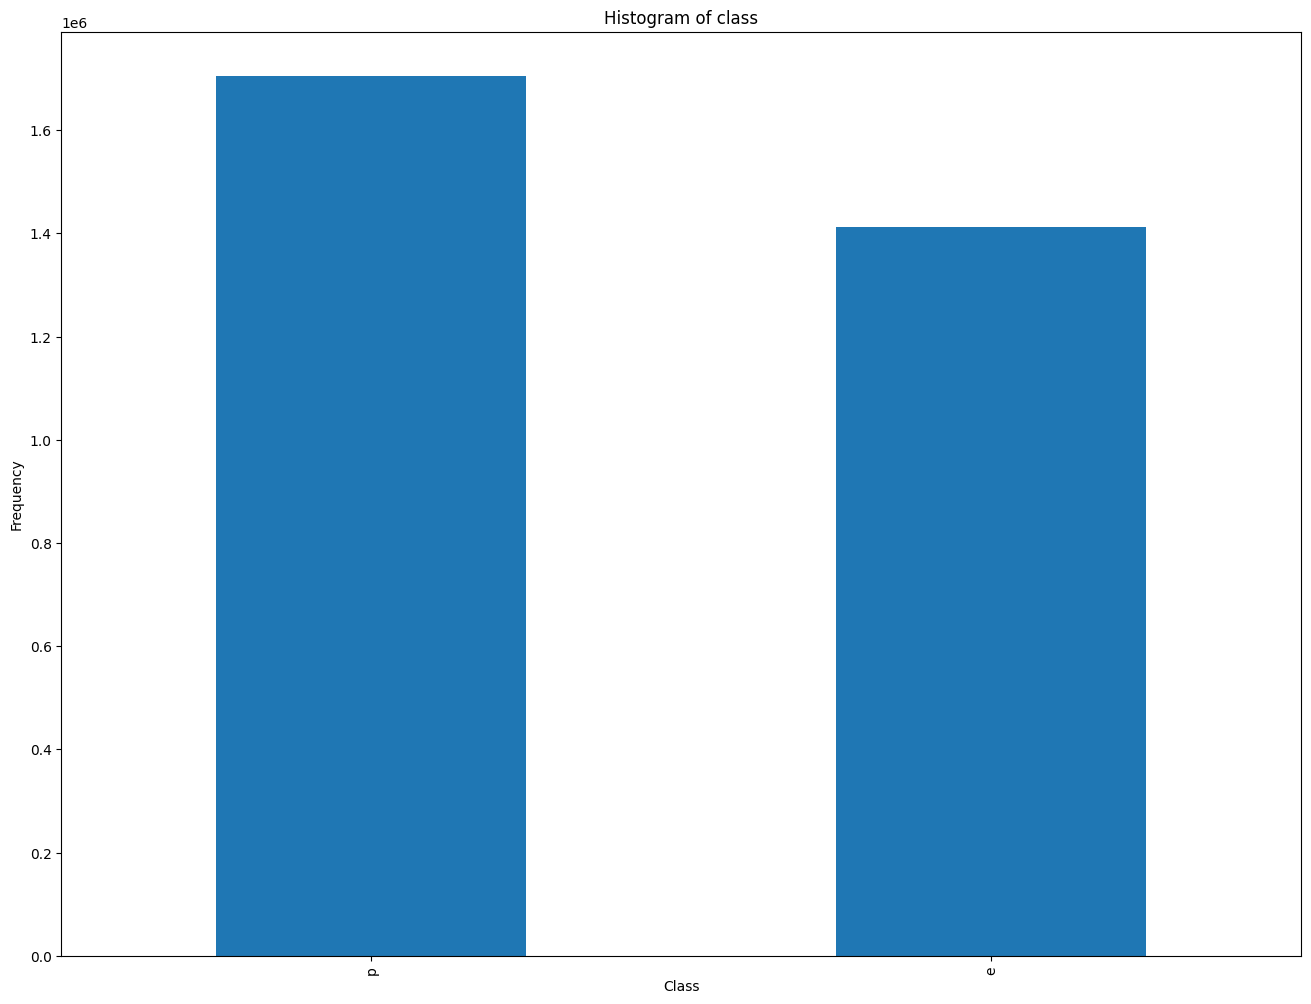

In [10]:
# Iterate through the columns and plot histograms
plt.figure(figsize=(16, 12))
train_df["class"].value_counts().plot(kind='bar')
plt.title(f'Histogram of class')
plt.xlabel("Class")
plt.ylabel('Frequency')
plt.show()

     1. cap-shape:                bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [11]:
# Display information about DataFrame including non-null counts
train_df.info()

train_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          object 
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(2), int64(1), object(19)
memory

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

## Data Balancing

For some feature are really inbalanced this can cause overfitting of the data when we train the model

In [12]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

# Assuming 'train_df' is your DataFrame
# Step 1: Label encode all categorical features
X = train_df.drop(columns=['class'])  # Features
y = train_df['class']  # Target column ('e' or 'p')

# Encode categorical features in X
encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column in X
for column in X.columns:
    if X[column].dtype == 'object':  # Check if the column is categorical
        X[column] = encoder.fit_transform(X[column].astype(str))  # Ensure conversion to string before encoding

# Encode target column 'class'
y = encoder.fit_transform(y)

# Apply RandomOverSampler to balance the target column
ros = RandomOverSampler(sampling_strategy='not majority', random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)


# The data is now fully label encoded
print("Label Encoded DataFrame shape:", X_resampled.shape)
print("Class column DataFrame shape:",  y_resampled.shape)

Label Encoded DataFrame shape: (3410792, 21)
Class column DataFrame shape: (3410792,)


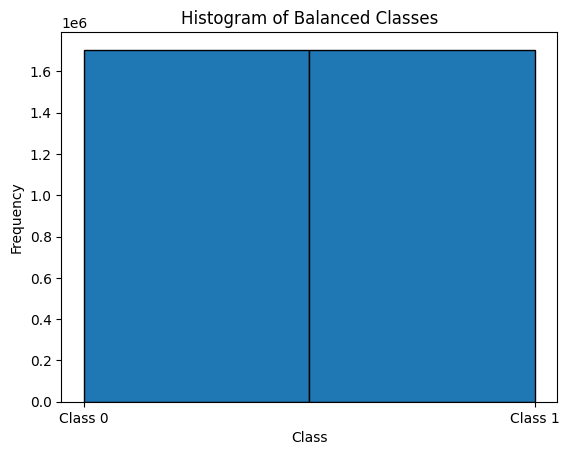

In [13]:
# Iterate through the columns and plot histograms
# Assuming y_resampled is the target column from the balanced dataset
plt.hist(y_resampled, bins=2, edgecolor='black')  # Bins=2 because there are two classes ('e' and 'p')
plt.title("Histogram of Balanced Classes")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks([0, 1], ['Class 0', 'Class 1'])  # Replace with actual class labels if needed
plt.show()

Now the classes or classification is balanced

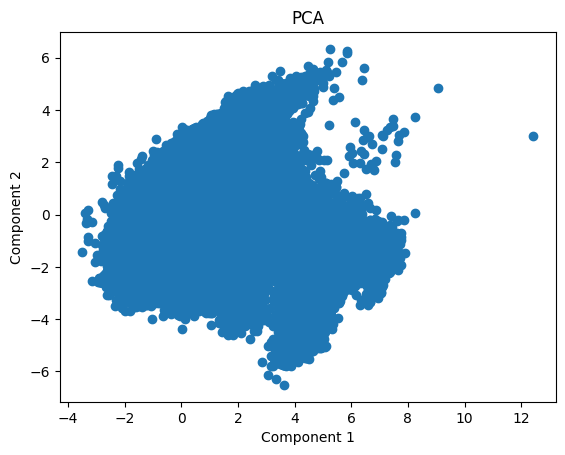

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming X is the label-encoded DataFrame
# Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # This standardizes the data (mean=0, std=1)

# Apply PCA first to reduce dimensionality (optional before t-SNE)
pca = PCA(n_components=21)  # Reduce to  components as an example
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

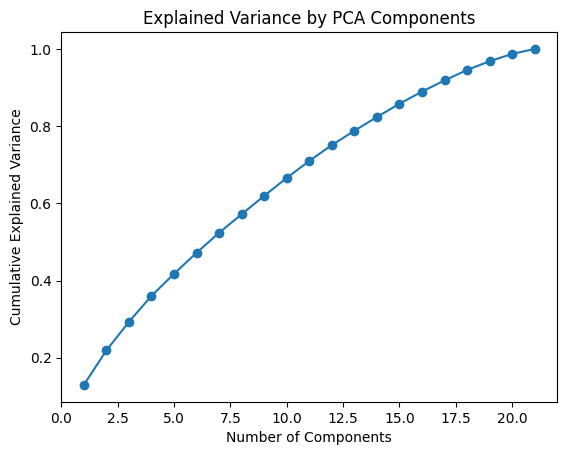

In [15]:
# See  variance of which can we use
# Plot the cumulative explained variance
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show()

This plot means that the 90-95% of the variance in encapsulated in about 18 feature

cluster
1    2715478
0     401467
Name: count, dtype: int64


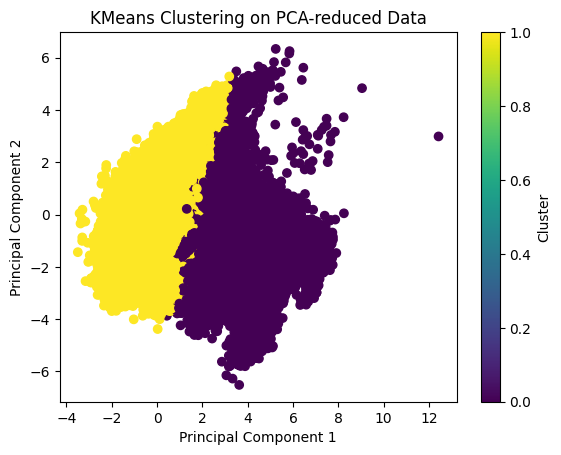

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X_pca is your PCA-reduced dataset
# Initialize KMeans with a specified number of clusters (e.g., 2)
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the KMeans model on the PCA-reduced data
kmeans.fit(X_pca)

# Predict the clusters for the PCA-reduced data
clusters = kmeans.predict(X_pca)

# Add the cluster labels to the PCA-reduced dataset for analysis
X_pca_clustered = pd.DataFrame(X_pca)
X_pca_clustered['cluster'] = clusters

# Visualize or analyze the resulting clusters
print(X_pca_clustered['cluster'].value_counts())

# Plot the clusters in 2D space (since X_pca has 2 dimensions)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('KMeans Clustering on PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [17]:
from sklearn.metrics import adjusted_rand_score

# Analyze how clusters correspond to the true labels
print(pd.crosstab(X_pca_clustered['cluster'], y))

# Calculate the Adjusted Rand Index (ARI) for evaluation
ari_score = adjusted_rand_score(y, X_pca_clustered['cluster'])
print(f'Adjusted Rand Index: {ari_score:.4f}')

col_0          0        1
cluster                  
0         180085   221382
1        1231464  1484014
Adjusted Rand Index: -0.0003


# Adjusted Rand Index (ARI) Score Analysis

An **Adjusted Rand Index (ARI) score of -0.0003** indicates that the clustering result is worse than random, which suggests that the clustering algorithm (e.g., KMeans) did not successfully separate the data into meaningful clusters that correspond to the true labels (`e` for edible and `p` for poisonous).

## Potential Reasons for a Low ARI Score:

### 1. Inadequate Clustering Algorithm:
- **KMeans** might not be the best algorithm for your data, especially if the clusters are not spherical or are of different sizes.
- Consider using algorithms like **DBSCAN**, **Gaussian Mixture Models (GMM)**, or **Agglomerative Clustering**, which might be better suited for non-spherical clusters.

### 2. High-Dimensional Data:
- Even after applying PCA, the remaining dimensions might not sufficiently separate the edible and poisonous mushrooms.

### 3. Class Overlap
- The edible and poisonous mushrooms might not be easily separable in feature space due to significant overlap in their characteristics.
- This could explain why clustering algorithms struggle to differentiate between the classes.

Further investigation into the mushroom dataset is needed to understand whether edible and poisonous mushrooms share many overlapping features. Domain-specific feature engineering may help reduce class overlap.

# Feature Engineering:
Add new features to your dataset through feature engineering. This can involve creating polynomial features, interaction features, or applying transformations that create new data dimensions.

torch.Size([3410792, 21])
Epoch [1/10], Loss: 372599.8438
Epoch [2/10], Loss: 359948.7812
Epoch [3/10], Loss: 373587.4688
Epoch [4/10], Loss: 373583.5625
Epoch [5/10], Loss: 373582.4688
Epoch [6/10], Loss: 373580.9375
Epoch [7/10], Loss: 373580.7500
Epoch [8/10], Loss: 373580.7188
Epoch [9/10], Loss: 369975.7188
Epoch [10/10], Loss: 373580.9375
(3410792, 50)
cluster
1    1705478
0    1705314
Name: count, dtype: int64


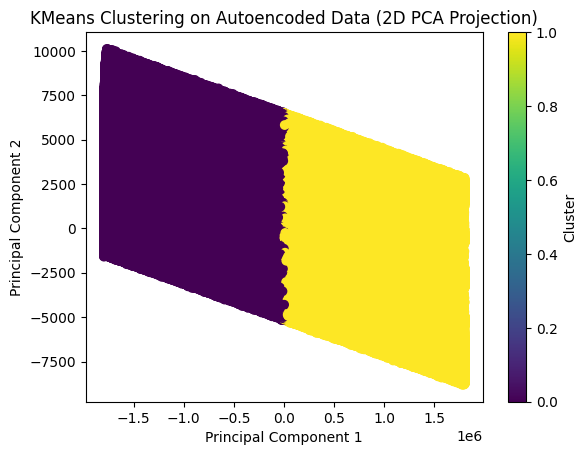

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim

# Assuming X_resampled is a Pandas DataFrame and needs to be converted to a NumPy array
X_resampled_scaled_tensor = torch.tensor(X_resampled.values, dtype=torch.float32)

# Now X_resampled_scaled_tensor is a PyTorch tensor
print(X_resampled_scaled_tensor.shape)


# Define the autoencoder class
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 50),  # Bottleneck layer with 50 dimensions
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(50, input_dim),  # Reconstruct back to the original dimensions
            nn.ReLU()  # Linear activation for the output
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Initialize the model, loss function, and optimizer
input_dim = X_resampled.shape[1]
autoencoder = Autoencoder(input_dim)

criterion = nn.MSELoss()  # Mean squared error loss
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Training loop
epochs = 10
batch_size = 256
n_batches = X_resampled.shape[0] // batch_size

for epoch in range(epochs):
    for i in range(n_batches):
        # Get the current batch
        batch_data = X_resampled_scaled_tensor[i*batch_size:(i+1)*batch_size]
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = autoencoder(batch_data)
        
        # Compute the loss
        loss = criterion(outputs, batch_data)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
    
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Get the encoded representation
with torch.no_grad():
    X_autoencoded_tensor = autoencoder.encoder(X_resampled_scaled_tensor)

# Convert the PyTorch tensor back to NumPy for further use
X_autoencoded = X_autoencoded_tensor.numpy()

print(X_autoencoded.shape)  # Check the shape to confirm the dimensionality increase

# Clustering using KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_autoencoded)
clusters = kmeans.predict(X_autoencoded)

# Add the cluster labels to the autoencoded dataset for analysis
X_autoencoded_df = pd.DataFrame(X_autoencoded)
X_autoencoded_df['cluster'] = clusters

# Analyze the cluster distribution
print(X_autoencoded_df['cluster'].value_counts())

# Visualize the clusters after reducing to 2D using PCA
pca = PCA(n_components=2)
X_pca_for_plot = pca.fit_transform(X_autoencoded)

# Plot the clusters in 2D space
plt.scatter(X_pca_for_plot[:, 0], X_pca_for_plot[:, 1], c=clusters, cmap='viridis')
plt.title('KMeans Clustering on Autoencoded Data (2D PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [28]:
from sklearn.metrics import adjusted_rand_score

# Analyze how clusters correspond to the true labels
print(pd.crosstab(X_autoencoded_df['cluster'][:3116945], y))

# Calculate the Adjusted Rand Index (ARI) for evaluation
ari_score = adjusted_rand_score(y, X_autoencoded_df['cluster'][:3116945])
print(f'Adjusted Rand Index: {ari_score:.4f}')

col_0         0       1
cluster                
0        705648  853102
1        705901  852294
Adjusted Rand Index: -0.0000


# Result and Analysis

The **Adjusted Rand Index (ARI)** score of `-0.0000` indicates that the clustering algorithm failed to find meaningful patterns in the data, suggesting that the clustering result is no better than random. This can happen due to several factors, such as inadequate clustering algorithms like KMeans, which may struggle with non-spherical or overlapping clusters. Additionally, dimensionality reduction techniques like PCA may have removed important information, making it difficult for the algorithm to separate the edible and poisonous mushrooms effectively. Trying alternative algorithms like DBSCAN, increasing the number of PCA components to retain more variance, or using advanced oversampling techniques like SMOTETomek may improve clustering performance and result in a higher ARI score.

# Discussion and Conclusion

The results from the unsupervised clustering methods, as indicated by the near-zero Adjusted Rand Index (ARI), suggest that the algorithms struggled to correctly identify meaningful patterns in the dataset. The clustering results were no better than random, highlighting potential issues with how the dataset was prepared and the inherent characteristics of the data.

One key challenge could be the nature of the features in the dataset, where the characteristics of edible and poisonous mushrooms overlap significantly. This overlap can confuse clustering algorithms like KMeans, which assumes spherical clusters and struggles with data that does not adhere to such shapes. Additionally, dimensionality reduction techniques like PCA, while useful, might have inadvertently removed important information that could have helped the clustering algorithm better differentiate between the two classes.

A more effective approach might involve refining the dataset itself. Ensuring stronger correlations between features and the target class could improve separability, making the clusters more distinct. Feature engineering, such as the creation of new, domain-specific features, might also help distinguish between edible and poisonous mushrooms. Moreover, using t-SNE as an alternative to PCA for dimensionality reduction could allow for better visualization and potentially uncover non-linear relationships that PCA might have missed. Unlike PCA, which is a linear technique, t-SNE excels at preserving local structure and revealing complex, non-linear relationships in high-dimensional data, potentially leading to better clustering results.

In conclusion, improving the dataset and exploring more sophisticated dimensionality reduction techniques like t-SNE, combined with alternative clustering methods such as DBSCAN, might yield more accurate clustering outcomes and lead to better separation between the edible and poisonous mushroom classes.